# **Mini-Projeto K-Means e DBSCAN**
---

Este mini-projeto tem como objetivo construir modelos preditivos para estimar a sobrevivência dos passageiros do Titanic utilizando os algoritmos de agrupamento (clustering) K-Means e DBSCAN. O naufrágio do Titanic é um dos desastres marítimos mais infames da história, e a análise dos dados dos passageiros fornece uma rica base para explorar técnicas de aprendizado de máquina.

**Objetivos:**
- Pré-processar os dados do Titanic para torná-los adequados para treinamento de modelos de aprendizado de máquina.
- Utilizar os algoritmos de agrupamento K-Means e DBSCAN para identificar padrões e agrupamentos nos dados dos passageiros.
- Avaliar os agrupamentos utilizando métricas adequadas e ajustar hiperparâmetros para otimização.

**Metodologia:**
1. **Coleta e Exploração de Dados:** Carregamento e análise inicial dos dados para entender a distribuição e características principais.
2. **Pré-processamento de Dados:** Tratamento de valores ausentes, codificação de variáveis categóricas e normalização dos dados.
3. **Construção dos Modelos de Clustering:** Aplicação dos algoritmos K-Means e DBSCAN para identificar agrupamentos nos dados.
4. **Treinamento e Avaliação:** Análise dos agrupamentos formados e avaliação da qualidade dos clusters utilizando métricas apropriadas.

**Grupo:**
* Cleber Victor da Silva Junior (cvsj)   
* João Marcelo de Souza Ferreira (jmsf3)
* Marcela Arruda Asfora (maa5)
* Maria Vitória Soares Muniz (mvsm3)
* Victor Pessoa Diniz (vpd)

## **Bibliotecas Utilizadas**
---

Neste projeto, utilizamos diversas bibliotecas do ecossistema Python para análise de dados, visualização e clustering:

- **NumPy:** Biblioteca para computação numérica em Python, utilizada para manipulação de arrays e operações matemáticas eficientes.
- **Pandas:** Biblioteca poderosa para análise e manipulação de dados, especialmente útil para trabalhar com dados tabulares. Utilizamos Pandas para carregar, limpar e transformar os dados do Titanic.
- **Seaborn:** Biblioteca de visualização de dados baseada no Matplotlib, que proporciona gráficos estatísticos atraentes e informativos. Utilizamos Seaborn para criar visualizações que ajudam a entender melhor os padrões e características dos dados.
- **Matplotlib:** Biblioteca de plotagem 2D que serve como base para o Seaborn, utilizada diretamente para personalizar e criar gráficos detalhados.
- **Scikit-learn:** Biblioteca modular que contém os modelos de clustering necessários para a atividade. Utilizada para a aplicação dos algoritmos K-Means e DBSCAN.

Essas bibliotecas, quando combinadas, fornecem um conjunto robusto de ferramentas para a análise de dados e a construção de modelos de agrupamento.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from tabulate import tabulate
from sklearn import preprocessing
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.cluster import DBSCAN, KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score

## **Base de Dados**
---

O dataset "Titanic - Machine Learning from Disaster" é um conjunto de dados clássico amplamente utilizado para o ensino e prática de técnicas de aprendizado de máquina. Ele contém informações detalhadas sobre os passageiros a bordo do RMS Titanic, que naufragou em sua viagem inaugural em 1912. O dataset inclui variáveis como idade, gênero, classe de cabine, tarifa paga, número de parentes a bordo, entre outras. A variável alvo é `Survived`, que indica se um passageiro sobreviveu ao desastre. Este conjunto de dados é ideal para explorar métodos de análise de dados, visualização, e construção de modelos preditivos, fornecendo uma rica base para entender como diferentes características podem influenciar a probabilidade de sobrevivência.

In [ ]:
!git clone https://github.com/victorpdiniz/IF684-Titanic.git

Cloning into 'IF684-Titanic'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 14 (delta 0), reused 11 (delta 0), pack-reused 0
Receiving objects: 100% (14/14), 265.79 KiB | 5.42 MiB/s, done.


In [ ]:
train_set = pd.read_csv('IF684-Titanic/data/train.csv')
test_set = pd.read_csv('IF684-Titanic/data/test.csv')

In [ ]:
test_survived = pd.read_csv('IF684-Titanic/data/gender_submission.csv')
test_set = test_set.merge(test_survived, on='PassengerId')

test_cols = test_set.columns.tolist()
test_cols.remove('Survived')
test_cols.insert(test_cols.index('PassengerId') + 1, 'Survived')

test_set = test_set[test_cols]

## **Análise Exploratória**
---

A análise exploratória dos dados é uma fase inicial que resume as principais características dos dados usando métodos visuais e estatísticos. Seu objetivo é compreender a estrutura dos dados, detectar padrões, identificar anomalias e verificar pressupostos, orientando o desenvolvimento de modelos preditivos. Nesta análise, abordaremos os seguintes tópicos: **Organização da Base de Dados**, **Análise por Faixa Etária**, **Análise por Gênero**, **Análise por Classe**, **Correlação** e **Dados Faltantes e Outliers**.

### **Organização da Base de Dados**

A base de dados  possui 891 linhas (cada linha representa um passageiro) e 12 colunas (cada coluna contém um atributo do passageiro, como identificador, idade, classe social, etc.). Na lista abaixo, estão todos os detalhes das colunas:

* **`PassengerId`:** Identificador único de cada passageiro (valores inteiros, sem valores ausentes).
* **`Survived`:** Indica se o passageiro sobreviveu ou não (valores inteiros: `1` para sobreviveu, `0` para não sobreviveu).
* **`Pclass`:** Classe social do passageiro (valores inteiros: `1` para primeira classe, `2` para segunda classe, `3` para terceira classe).
* **`Name`:** Nome completo do passageiro (valores de texto).
* **`Sex`:** Sexo do passageiro (valores de texto: `'male'` para masculino, `'female'` para feminino).
* **`Age`:** Idade do passageiro em anos (valores decimais, com alguns valores ausentes).
* **`SibSp`:** Número de irmãos e cônjuge a bordo (valores inteiros).
* **`Parch`:** Número de pais e filhos a bordo (valores inteiros).
* **`Ticket`:** Número do bilhete do passageiro (valores de texto).
* **`Fare`:** Tarifa paga pelo passageiro (valores decimais).
* **`Cabin`:** Número da cabine do passageiro (valores de texto, com muitos valores ausentes).
* **`Embarked`:** Porto de embarque do passageiro (valores de texto: `'S'` para Southampton, `'C'` para Cherbourg, `'Q'` para Queenstown).





In [ ]:
train_set.shape

(891, 12)

In [ ]:
print(tabulate(train_set, headers='keys', tablefmt='psql'))

+-----+---------------+------------+----------+------------------------------------------------------------------------------------+--------+--------+---------+---------+--------------------+----------+-----------------+------------+
|     |   PassengerId |   Survived |   Pclass | Name                                                                               | Sex    |    Age |   SibSp |   Parch | Ticket             |     Fare | Cabin           | Embarked   |
|-----+---------------+------------+----------+------------------------------------------------------------------------------------+--------+--------+---------+---------+--------------------+----------+-----------------+------------|
|   0 |             1 |          0 |        3 | Braund, Mr. Owen Harris                                                            | male   |  22    |       1 |       0 | A/5 21171          |   7.25   | nan             | S          |
|   1 |             2 |          1 |        1 | Cumings, Mrs. Jo

In [ ]:
train_set.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Variáveis numéricas
numeric_features = train_set.select_dtypes(include=np.number)
numeric_features.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
# Variáveis categóricas
categoric_features = train_set.select_dtypes(exclude=np.number)
categoric_features.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

### **Análise por Faixa Etária**

***Porcentagem de Passageiros por Faixa Etária***

A base de dados apresenta a seguinte distribuição por faixa etária:
* `Crianças`: 69 indivíduos, representando **7.7%** dos passageiros.
* `Adolescentes`: 44 indivíduos, representando **4.9%** dos passageiros.
* `Adultos`: 590 indivíduos, representando **66.3%** dos passageiros.
* `Idosos`: 188 indivíduos, representando **21.1%** dos passageiros.

Critério utilizado para classificar as faixas etárias:
* `Crianças`: Idade menor ou igual a 12 anos
* `Adolescentes`: Idade entre 13 e 17 anos
* `Adultos`: Idade entre 18 e 64 anos
* `Idosos`: Idade maior de 64 anos

Foi realizada uma análise dos percentuais de sobreviventes e não sobreviventes por faixa etária, revelando os seguintes resultados:

***Porcentagem de Não Sobreviventes por Faixa Etária***

* `Crianças`: 42.03%
* `Adolescentes`: 52.27%
* `Adultos`: 61.36%
* `Idosos`: 71.80%

***Porcentagem de Sobreviventes por Faixa Etária***

* `Crianças`: 57.97%
* `Adolescentes`: 47.73%
* `Adultos`: 38.64%
* `Idosos`: 28.20%

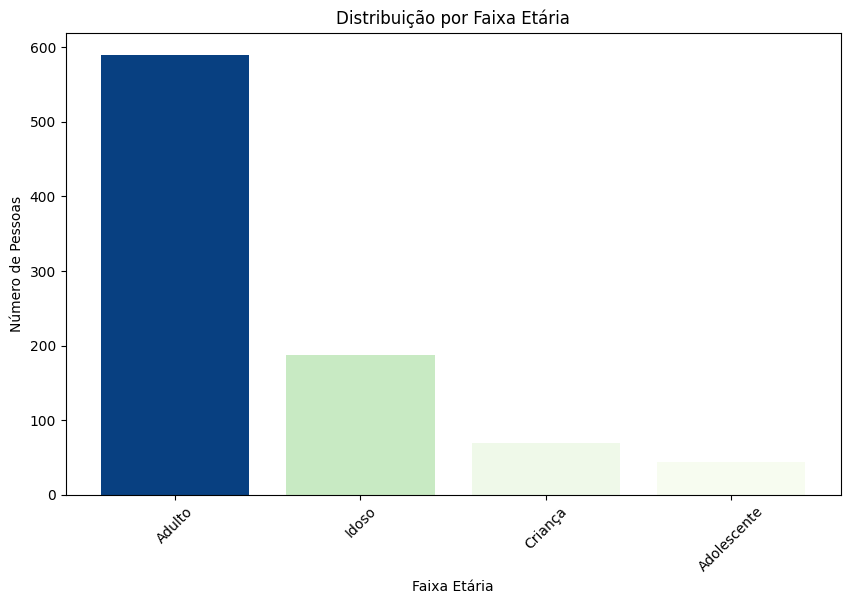

In [ ]:
def categorize_age(age):
    if age <= 12:
        return 'Criança'
    elif 13 <= age <= 17:
        return 'Adolescente'
    elif 18 <= age <= 64:
        return 'Adulto'
    else:
        return 'Idoso'

temp_df = train_set.copy()
temp_df['AgeGroup'] = temp_df['Age'].apply(categorize_age)

age_group_counts = temp_df['AgeGroup'].value_counts()

cmap = plt.get_cmap('GnBu')
norm = plt.Normalize(age_group_counts.min(), age_group_counts.max())
colors = cmap(norm(age_group_counts.values))

plt.figure(figsize=(10, 6))
bars = plt.bar(age_group_counts.index, age_group_counts.values, color=colors)
plt.title('Distribuição por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Pessoas')
plt.xticks(rotation=45)

plt.show()

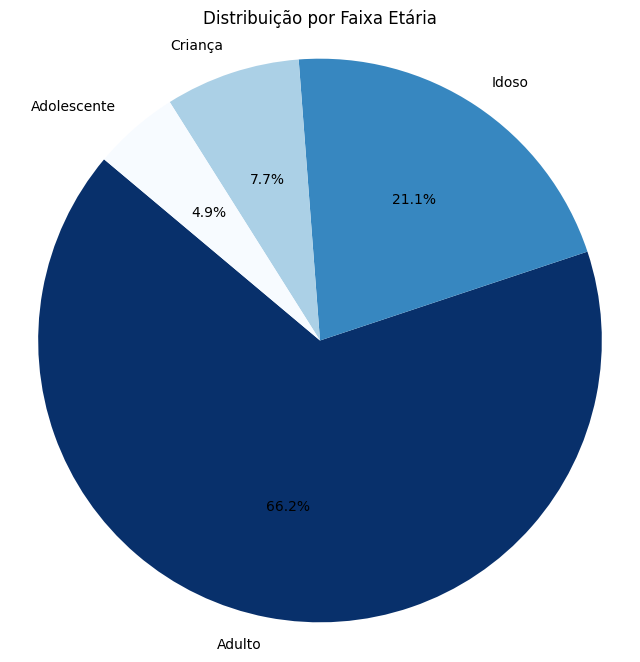

In [ ]:
total_people = len(temp_df)
age_group_percentage = age_group_counts / total_people * 100

cmap = plt.get_cmap('Blues_r')
colors = cmap(np.linspace(0, 1, len(age_group_percentage)))

plt.figure(figsize=(8, 8))
plt.pie(age_group_percentage, labels=age_group_percentage.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribuição por Faixa Etária')
plt.axis('equal')

plt.show()

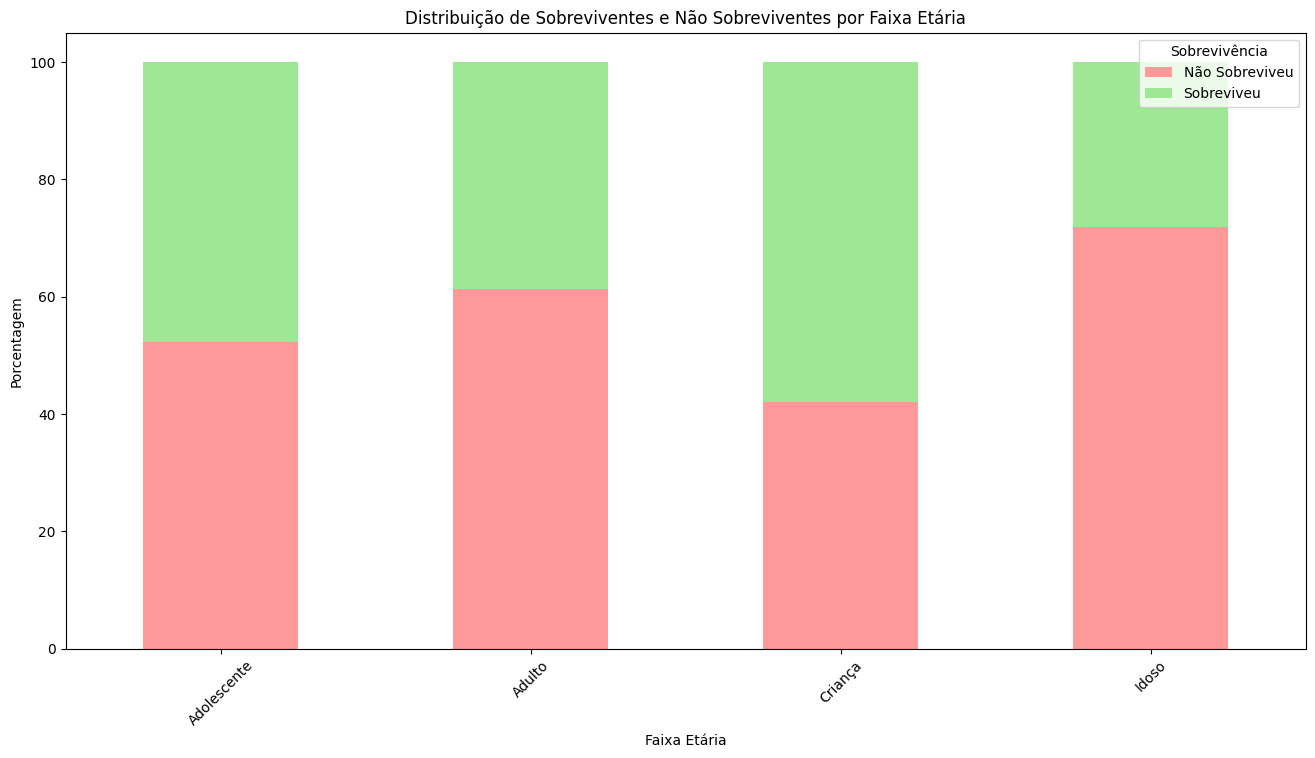

In [ ]:
age_group_survival = temp_df.groupby(['AgeGroup', 'Survived']).size().unstack(fill_value=0)

totals = age_group_survival.sum(axis=1)
age_group_survival['Porcentagem Sobreviveu'] = age_group_survival[1] / totals * 100
age_group_survival['Porcentagem Não Sobreviveu'] = age_group_survival[0] / totals * 100

fig, ax = plt.subplots(figsize=(16, 8))
age_group_survival[['Porcentagem Não Sobreviveu', 'Porcentagem Sobreviveu']].plot(kind='bar', stacked=True, ax=ax, color=['#ff9999', '#9ee895'])
ax.set_title('Distribuição de Sobreviventes e Não Sobreviventes por Faixa Etária')
ax.set_xlabel('Faixa Etária')
ax.set_ylabel('Porcentagem')
ax.set_xticklabels(age_group_survival.index, rotation=45)
ax.legend(['Não Sobreviveu', 'Sobreviveu'], title='Sobrevivência')

plt.show()

### **Análise por Gênero**

A base de dados apresenta a seguinte distribuição por gênero:

* `Mulheres`: 314 indivíduos, representando **35.2%** dos passageiros.
* `Homens`: 577 indivíduos, representando **64.8%** dos passageiros.

***Porcentagem de Sobreviventes por Sexo***

* `Mulheres`: 74.20%
* `Homens`: 18.89%

***Porcentagem de Não Sobreviventes por Sexo***
* `Mulheres`: 25.80%
* `Homens`: 81.11%

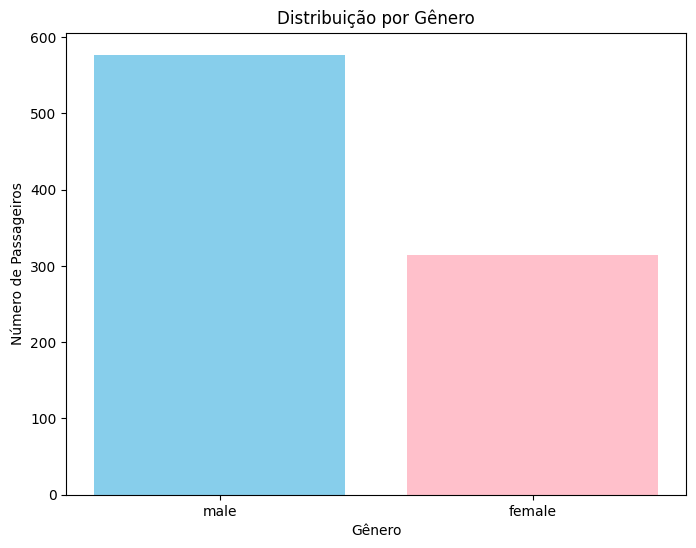

In [ ]:
sex_counts = train_set['Sex'].value_counts()

colors = ['skyblue', 'pink']

plt.figure(figsize=(8, 6))
plt.bar(sex_counts.index, sex_counts.values, color=colors)
plt.title('Distribuição por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Passageiros')

plt.show()

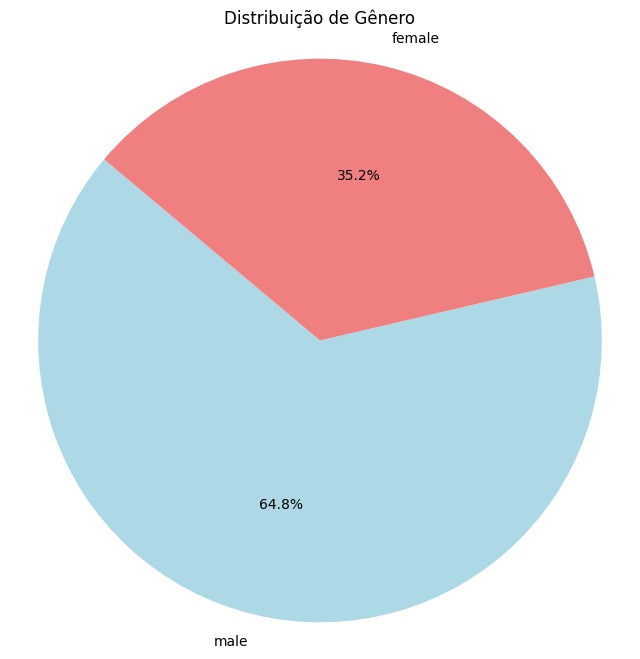

In [ ]:
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribuição de Gênero')
plt.axis('equal')

plt.show()

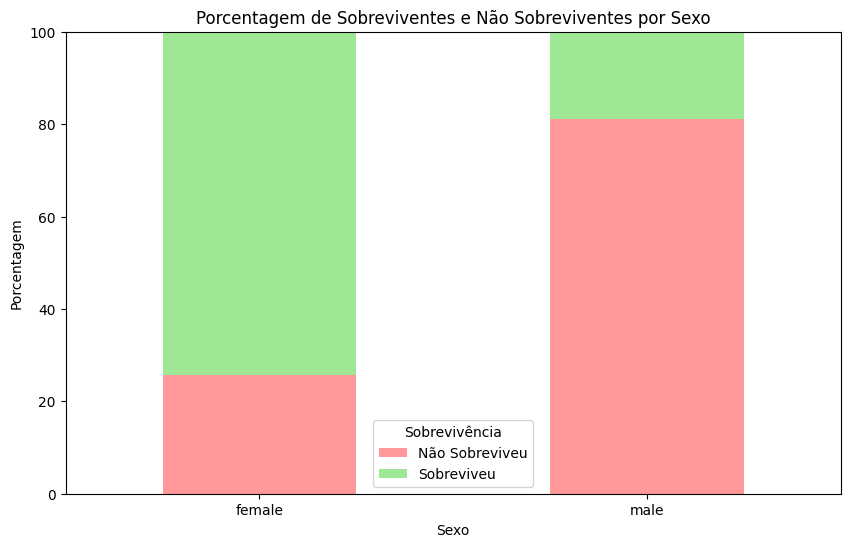

In [ ]:
survival_sex_counts = train_set.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)

totals = survival_sex_counts.sum(axis=1)
survival_sex_counts['Porcentagem Sobreviveu'] = survival_sex_counts[1] / totals * 100
survival_sex_counts['Porcentagem Não Sobreviveu'] = survival_sex_counts[0] / totals * 100
survival_sex_counts[['Porcentagem Não Sobreviveu', 'Porcentagem Sobreviveu']].plot(kind='bar', stacked=True, color=['#ff9999', '#9ee895']  , figsize=(10, 6))

plt.title('Porcentagem de Sobreviventes e Não Sobreviventes por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Porcentagem')
plt.legend(['Não Sobreviveu', 'Sobreviveu'], title='Sobrevivência')
plt.xticks(rotation=0)
plt.ylim(0, 100)

plt.show()

### **Análise por Classe**

A base de dados apresenta a seguinte distribuição por classe:

* `Primeira classe`: 216 indivíduos, representando **24.2%** dos passageiros.
* `Segunda classe`: 184 indivíduos, representando **20.7%** dos passageiros.
* `Terceira classe`: 491 indivíduos, representando **55.1%** dos passageiros.

***Porcentagem de Sobreviventes por Classe***

* `Primeira classe`: 62.96%
* `Segunda classe`: 47.28%
* `Terceira classe`: 24.24%

***Porcentagem de Não Sobreviventes por Classe***
* `Primeira classe`: 37.04%
* `Segunda classe`: 52.72%
* `Terceira classe`: 75.76%


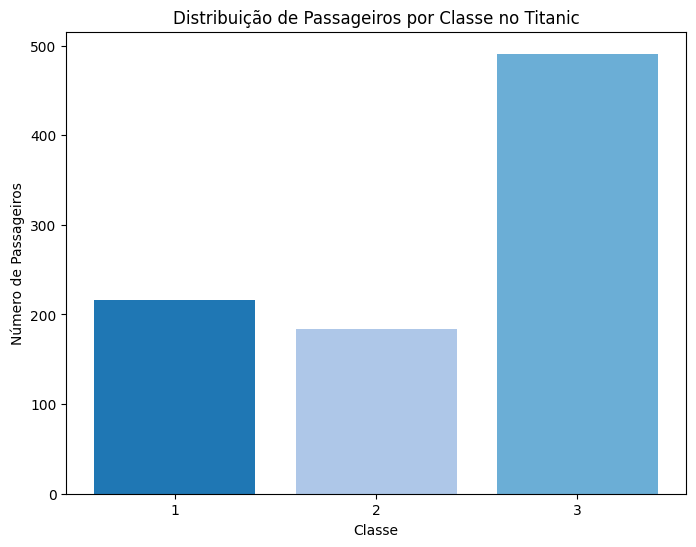

In [ ]:
class_counts = train_set['Pclass'].value_counts().sort_index()

colors = ['#1f77b4', '#aec7e8', '#6baed6']

plt.figure(figsize=(8, 6))
bars = plt.bar(class_counts.index.astype(str), class_counts.values, color=colors)

plt.title('Distribuição de Passageiros por Classe no Titanic')
plt.xlabel('Classe')
plt.ylabel('Número de Passageiros')
plt.xticks(rotation=0)

plt.show()

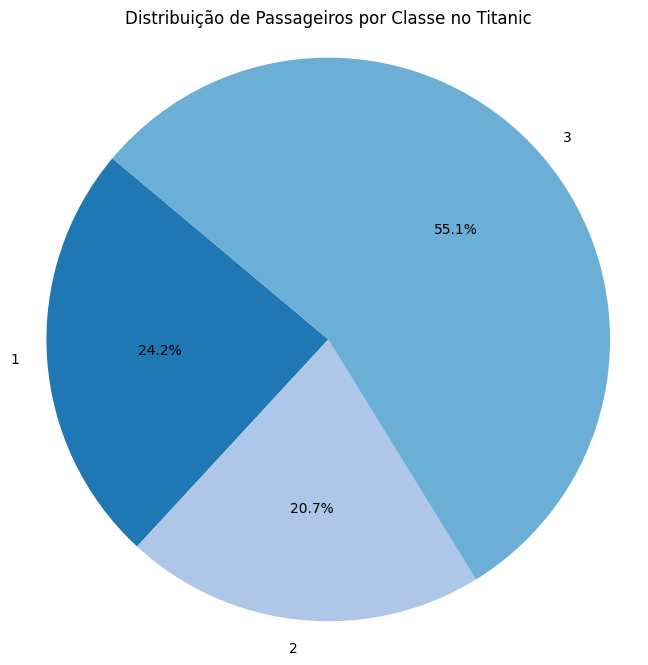

In [ ]:
labels = class_counts.index.astype(str)
sizes = class_counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribuição de Passageiros por Classe no Titanic')
plt.axis('equal')

plt.show()

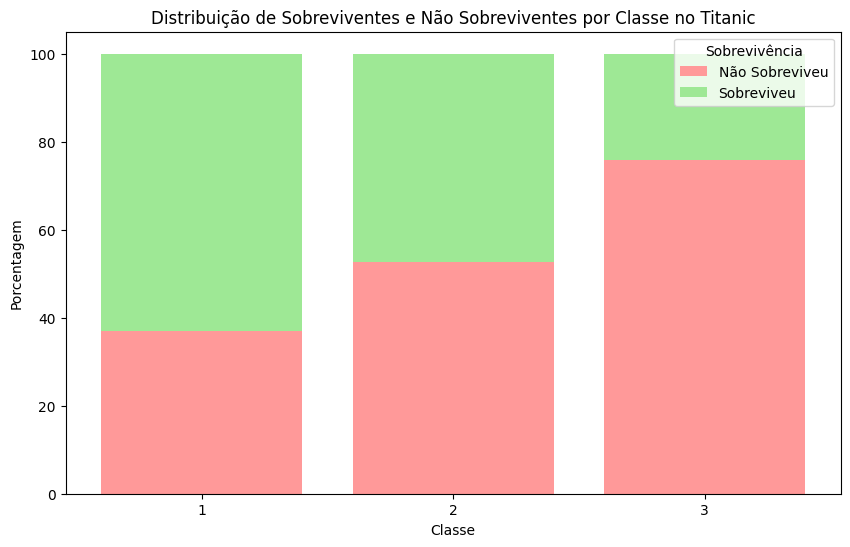

In [ ]:
survival_by_class = train_set.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)
totals = survival_by_class.sum(axis=1)

survival_by_class['Porcentagem Sobreviveu'] = survival_by_class[1] / totals * 100
survival_by_class['Porcentagem Não Sobreviveu'] = survival_by_class[0] / totals * 100

labels = survival_by_class.index.astype(str)
sobreviveu = survival_by_class['Porcentagem Sobreviveu']
n_sobreviveu = survival_by_class['Porcentagem Não Sobreviveu']

colors = ['#ff9999', '#9ee895']

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, n_sobreviveu, color=colors[0], label='Não Sobreviveu')
ax.bar(labels, sobreviveu, bottom=n_sobreviveu, color=colors[1], label='Sobreviveu')

ax.set_title('Distribuição de Sobreviventes e Não Sobreviventes por Classe no Titanic')
ax.set_xlabel('Classe')
ax.set_ylabel('Porcentagem')
ax.legend(title='Sobrevivência')

plt.show()

### **Correlação**

A análise de correlações entre variáveis é uma etapa fundamental na exploração e entendimento de um conjunto de dados. Correlações indicam o grau de relacionamento entre duas variáveis e podem fornecer insights valiosos sobre como uma variável pode influenciar outra.

In [ ]:
# Correlação das variáveis numéricas em relação ao atributo 'Survived'
correlation = numeric_features.corr()
print(correlation['Survived'].sort_values(ascending=False), '\n')

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64 



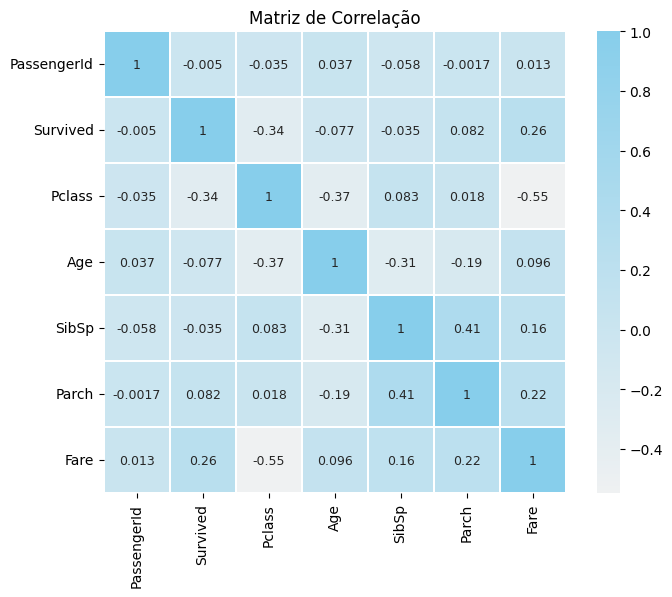

In [ ]:
# Mapa de calor da matriz de correlação entre todas as variáveis
cmap = sns.light_palette('skyblue', as_cmap=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, square=True, cmap=cmap, annot=True, annot_kws={'size': 9}, linecolor='white', linewidths=0.01)
plt.title('Matriz de Correlação')
plt.show()

### **Dados Faltantes e Outliers**

A coluna `Age` apresenta 177 valores faltantes, indicando que uma quantidade significativa de passageiros não teve sua idade registrada. A coluna `Cabin` é a que apresenta o maior número de dados ausentes, com 687 valores faltantes, sugerindo que muitas cabines não foram registradas ou os passageiros não tinham uma cabine específica. A coluna `Embarked` possui apenas 2 valores faltantes, mostrando que a maioria dos passageiros tem o porto de embarque registrado.

In [ ]:
missing = train_set.isnull().sum()
print(missing)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


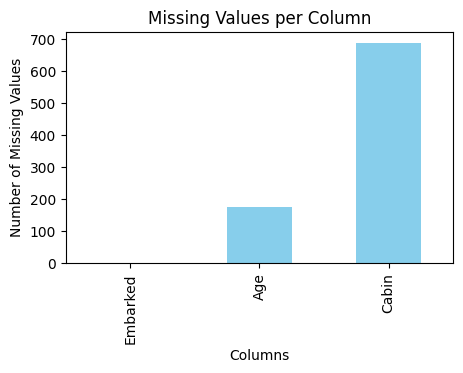

In [ ]:
missing = missing[missing > 0]
missing.sort_values(inplace=True)

missing.plot.bar(color='skyblue', figsize=(5, 3))
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values per Column')

plt.show()

In [ ]:
outliers = {}

for col in train_set.columns:
    if pd.api.types.is_numeric_dtype(train_set[col]):
        Q1 = train_set[col].quantile(0.25)
        Q3 = train_set[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = train_set[(train_set[col] < lower_bound) | (train_set[col] > upper_bound)][col].count()

print('Número de Outliers por Coluna:')
print(outliers)

Número de Outliers por Coluna:
{'PassengerId': 0, 'Survived': 0, 'Pclass': 0, 'Age': 11, 'SibSp': 46, 'Parch': 213, 'Fare': 116}


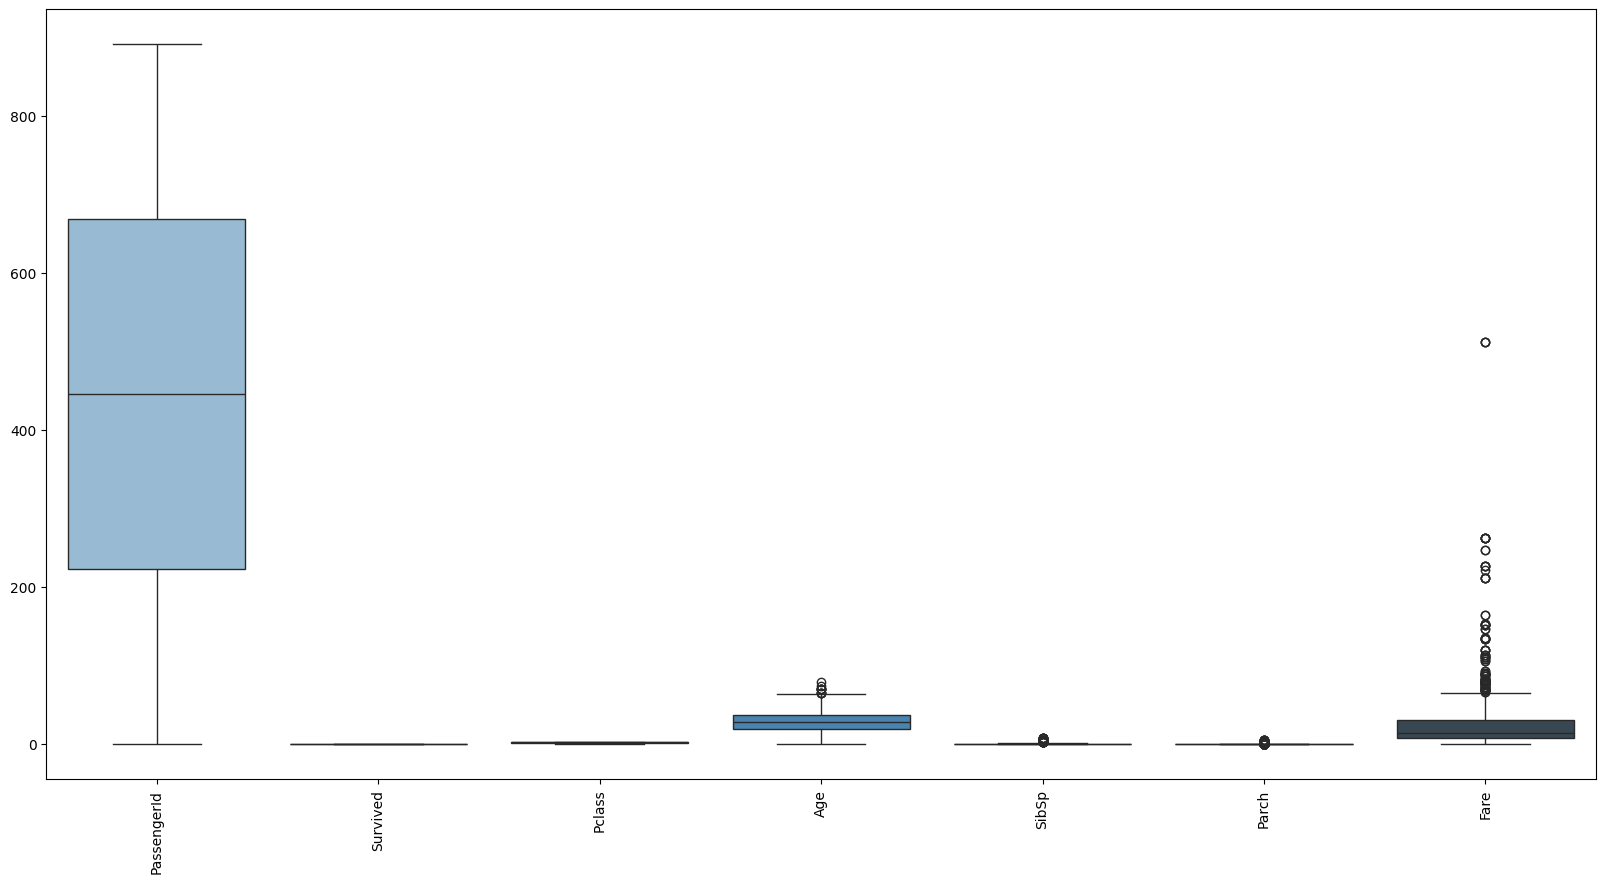

In [ ]:
# Plotando outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=train_set, palette='Blues_d')
plt.xticks(rotation=90)
plt.show()

## **Tratamento dos Dados**
---

O tratamento dos dados é uma etapa crucial para garantir que os algoritmos de clustering possam identificar padrões de maneira eficiente e produzir resultados significativos. No projeto de análise dos dados dos passageiros do Titanic, realizamos as seguintes etapas de pré-processamento: **Tratamento de Valores Ausentes**, **Criação de Novas Características**, **Escalonamento de Dados**, **Codificação de Variáveis Categóricas** e **Remoção de Colunas Irrelevantes**.

### **Tratamento de Valores Ausentes**

- **`Age`:** Valores ausentes são preenchidos com a mediana das idades dos passageiros.
- **`Fare`:** Valores ausentes são preenchidos com a média dos valores do atributo.
- **`Cabin`:** Devido ao grande número de valores ausentes, esta coluna é descartada.
- **`Embarked`:** Valores ausentes são preenchidos com o porto de embarque mais frequente.

In [ ]:
from sklearn.impute import SimpleImputer

# Preencher valores ausentes na coluna 'Age' com a mediana
age_imputer = SimpleImputer(strategy='median')
test_set['Age'] = age_imputer.fit_transform(test_set[['Age']])
train_set['Age'] = age_imputer.fit_transform(train_set[['Age']])

# Remover os valores ausentes da coluna 'Fare'
fare_imputer = SimpleImputer(strategy='mean')
test_set['Fare'] = age_imputer.fit_transform(test_set[['Fare']])
train_set['Fare'] = age_imputer.fit_transform(train_set[['Fare']])

# Descartar a coluna 'Cabin' devido ao grande número de valores ausentes
test_set.drop(columns=['Cabin'], inplace=True)
train_set.drop(columns=['Cabin'], inplace=True)

# Preencher valores ausentes na coluna 'Embarked' com o valor mais frequente
embarked_imputer = SimpleImputer(strategy='most_frequent')
test_set['Embarked'] = embarked_imputer.fit_transform(test_set[['Embarked']]).ravel()
train_set['Embarked'] = embarked_imputer.fit_transform(train_set[['Embarked']]).ravel()

# Verificar se ainda há valores ausentes
print(test_set.isnull().sum(), '\n')
print(train_set.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### **Criação de Novas Características**

- **`Title`:** Extraímos os títulos dos nomes dos passageiros (`Mr`, `Mrs`, `Miss`, etc.) e os utilizamos como uma nova característica categórica.
- **`AgeGroup`:** Agrupamos a idade dos passageiros em faixas etárias distintas para criar uma nova característica categórica. Esta abordagem ajuda a modelar a relação não linear entre idade e sobrevivência e pode melhorar o desempenho do modelo preditivo.
- **`FamilySize`:** Combinamos as colunas `SibSp` (número de irmãos/cônjuges a bordo) e `Parch` (número de pais/filhos a bordo) para criar uma nova coluna `FamilySize`.

In [ ]:
# Extraímos os títulos dos nomes dos passageiros
test_set['Title'] = test_set['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train_set['Title'] = train_set['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Agrupamos os títulos raros em uma categoria única
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
test_set['Title'] = test_set['Title'].replace(rare_titles, 'Rare')
test_set['Title'] = test_set['Title'].replace(['Mlle', 'Ms'], 'Miss')
test_set['Title'] = test_set['Title'].replace('Mme', 'Mrs')

train_set['Title'] = train_set['Title'].replace(rare_titles, 'Rare')
train_set['Title'] = train_set['Title'].replace(['Mlle', 'Ms'], 'Miss')
train_set['Title'] = train_set['Title'].replace('Mme', 'Mrs')

# Agrupamos a idade dos passageiros em faixas etárias distintas
test_set['AgeGroup'] = pd.cut(test_set['Age'], bins=[0, 12, 17, 64, np.inf], labels=['Child', 'Teen', 'Adult', 'Senior'])
train_set['AgeGroup'] = pd.cut(train_set['Age'], bins=[0, 12, 17, 64, np.inf], labels=['Child', 'Teen', 'Adult', 'Senior'])

# Combinamos as colunas 'SibSp' e 'Parch' para criar a coluna 'FamilySize'
test_set['FamilySize'] = test_set['SibSp'] + test_set['Parch'] + 1
train_set['FamilySize'] = train_set['SibSp'] + train_set['Parch'] + 1

### **Escalonamento de Dados**


- **`Fare`:** Escalonamos as tarifas para garantir que todas as características estejam na mesma escala. Utilizamos o escalonamento Min-Max.
- **`FamilySize`:** Também escalonamos o tamanho das famílias usando as mesmas técnica da coluna de tarifas.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Escalonamento Min-Max para a coluna 'Fare'
test_set['Fare'] = scaler.fit_transform(test_set[['Fare']])
train_set['Fare'] = scaler.transform(train_set[['Fare']])

# Escalonamento Min-Max para a coluna 'FamilySize'
test_set['FamilySize'] = scaler.fit_transform(test_set[['FamilySize']])
train_set['FamilySize'] = scaler.transform(train_set[['FamilySize']])

### **Codificação de Variáveis Categóricas**

- **`Pclass`:** Utilizamos One-Hot Encoding para transformar os valores de classe social em variáveis binárias.
- **`Sex`:** Utilizamos One-Hot Encoding para transformar os valores de gênero em variáveis binárias.
- **`Embarked`:** Utilizamos One-Hot Encoding para transformar os valores categóricos (`'C'`, `'Q'`, `'S'`) em variáveis binárias.
- **`Title`:** Utilizamos One-Hot Encoding para transformar os títulos extraídos dos nomes dos passageiros (como `Mr`, `Mrs`, `Miss`, etc.) em variáveis binárias. Isso ajuda a capturar mais informações sobre o status social e o gênero dos passageiros.
- **`AgeGroup`:** Utilizamos One-Hot Encoding para transformar as faixas etárias (`'Child'`, `'Teen'`, `'Adult'`, `'Senior'`) em variáveis binárias. Esta abordagem permite modelar a relação não linear entre idade e sobrevivência de maneira mais eficaz.

In [ ]:
# Codificar as variáveis categóricas
test_set = pd.get_dummies(test_set, columns=['Pclass', 'Sex', 'Embarked', 'Title', 'AgeGroup'])
train_set = pd.get_dummies(train_set, columns=['Pclass', 'Sex', 'Embarked', 'Title', 'AgeGroup'])

### **Remoção de Colunas Irrelevantes**


- **`PassengerId`:** Esta coluna não possui relevância preditiva e é removida.
- **`Name`:** Fora o título, julgamos que esta coluna também não possui relevância preditiva, logo, é removida.
- **`Age`:** Após a criação da coluna `AgeGroup`, a coluna original de idade se torna redundante e é removida para simplificar o modelo.
- **`SibSp`:** Com a criação da nova coluna `FamilySize`, a coluna `SibSp` (número de irmãos/cônjuges a bordo) é redundante e pode ser removida.
- **`Parch`:** Similarmente, após a criação da coluna `FamilySize`, a coluna `Parch` (número de pais/filhos a bordo) também se torna redundante e é removida.
- **`Ticket`:** Esta coluna é removida, a menos que se decida extrair algum padrão ou característica útil.

In [ ]:
# Remover colunas irrelevantes
test_set.drop(columns=['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket'], inplace=True)
train_set.drop(columns=['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket'], inplace=True)

In [ ]:
test_set.head()

,Survived,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,AgeGroup_Child,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Senior
0,0,0.015282,0.0,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False
1,1,0.013663,0.1,False,False,True,True,False,False,False,True,False,False,False,True,False,False,False,True,False
2,0,0.018909,0.0,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,True,False
3,0,0.016908,0.0,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False
4,1,0.023984,0.2,False,False,True,True,False,False,False,True,False,False,False,True,False,False,False,True,False


In [ ]:
train_set.head()

,Survived,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,AgeGroup_Child,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Senior
0,0,0.014151,0.1,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False
1,1,0.139136,0.1,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False
2,1,0.015469,0.0,False,False,True,True,False,False,False,True,False,True,False,False,False,False,False,True,False
3,1,0.103644,0.1,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False
4,0,0.015713,0.0,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False


## **Análise Experimental**
---

Para aplicar os algoritmos K-Means e DBSCAN das bibliotecas `sklearn.cluster` e `sklearn.ensemble`, seguimos um processo bem definido que envolve as seguintes etapas: **Transformação do Dataset em Não-Supervisionado, Treinamento / Teste de Modelos e Comparação com os Valores Reais.**

### **Transformação do Dataset em Não-Supervisionado**

Primeiramente, como o problema será considerado não supervisionado, removemos a coluna `Survived` do *dataset* utilizado nos modelos de clustering.

In [ ]:
X_model = train_set.drop(['Survived'], axis=1)

### **Treinamento / Teste de Modelos**

#### **K-Means**

Vamos começar variando o número de clusters $K$ do K-Means para encontrar um valor razoável, utilizando os métodos "Elbow", "Calinski-Harabasz", "Davies-Bouldin", "Silhouette" e "BIC".

##### **Método Elbow**


Esse método é caracterizado por encontrar um valor apropriado de K, no qual a inércia - uma métrica baseada em distância, que afere o quão bem o dataset foi separado em clusters pelo modelo - começa a decair linearmente.

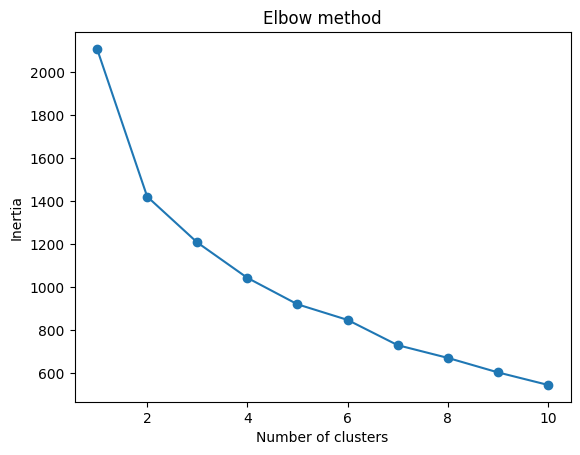

In [ ]:
import warnings
warnings.filterwarnings("ignore")
inertias = []

for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(X_model)
    inertias.append(KM.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

A partir dessa métrica, podemos tomar $K = 2$, já que é o ponto inicial para o qual a inércia passa a decair linearmente. Perceba que isso faz sentido, uma vez que queremos saber se os passageiros sobrevieram ou não no incidente.

##### **Silhouette Score**

O *score* funciona medindo a similaridade de cada amostra com o *cluster* ao qual ela pertence e o quão diferente ela é dos outros *clusters*. O *score* varia de $[-1, 1]$ e, quanto mais alto ele for, melhor o modelo conseguiu encaixar as amostras nos clusters.

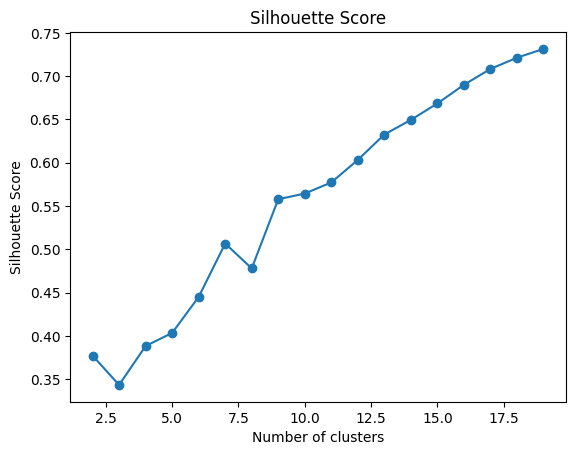

In [ ]:
silhouette_scores = []

for i in range(2,20):
    KM = KMeans(n_clusters=i)
    KM.fit(X_model)
    silhouette_scores.append(silhouette_score(X_model, KM.labels_))

plt.plot(range(2,20), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

Perceba que o *score* aumenta proporcionalmente à quantidade de clusters do modelo. No entanto, uma quantidade tão grande de agrupamentos indica que a métrica não conseguiu correlacionar bem as variáveis, já que os dados ficariam muito descentralizados em tantas subdivisões.

##### **Calinski-Harabasz Score**

Essa métrica mede a relação entre a dispersão intra-clusters e a dispersão inter-clusters. Quanto maior o valor do índice Calinski-Harabasz, melhor é a separação entre os clusters.

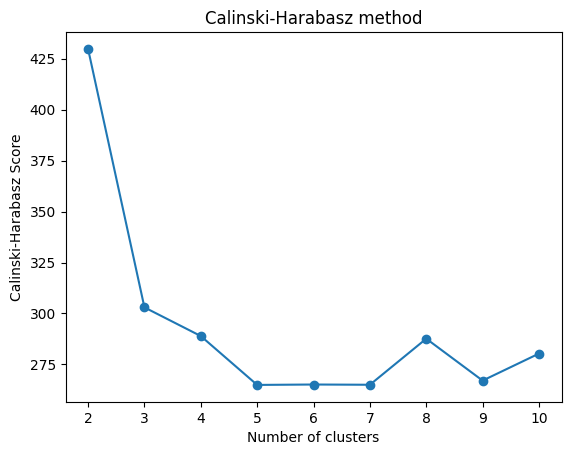

In [ ]:
ch_scores = []

for i in range(2,11):
    KM = KMeans(n_clusters=i)
    KM.fit(X_model)
    ch_scores.append(calinski_harabasz_score(X_model, KM.labels_))

plt.plot(range(2,11), ch_scores, marker='o')
plt.title('Calinski-Harabasz method')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.show()

O score se mostra notoriamente maior quando $K = 2$.

##### **Davies-Bouldin Score**

Essa métrica faz uma avaliação interna, comparando a similiaridade entre um cluster e o cluster mais similar a ele. Ele é dado pela proporção entre a distância inter-clusters e a intra-clusters. Um baixo valor indica uma melhor solução.

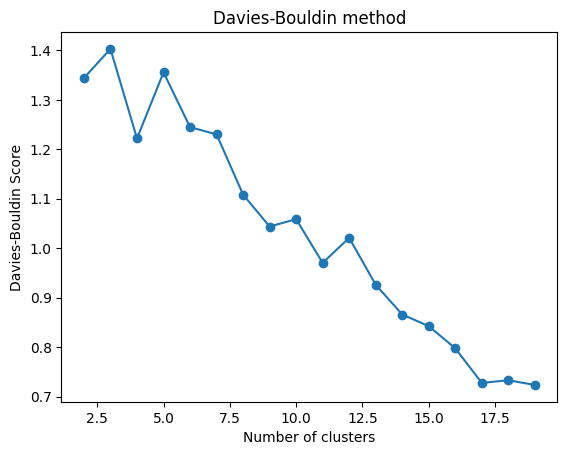

In [ ]:
db_scores = []

for i in range(2,20):
    KM = KMeans(n_clusters=i)
    KM.fit(X_model)
    db_scores.append(davies_bouldin_score(X_model, KM.labels_))

plt.plot(range(2,20), db_scores, marker='o')
plt.title('Davies-Bouldin method')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Score')
plt.show()

O valor continua diminuindo a medida que a quantidade de clusters aumenta, sendo 19 o melhor resultado encontrado no nosso intervalo.

No entanto, é válido mencionar que esta métrica não leva em conta a estrutura ou distribuição dos dados, como clusters dentro de outros e relações não-lineares.

###### **BIC - Bayes Information Criterion**

O objetivo do BIC é encontrar um modelo cuja quantidade de clusters maximize a verossimilhança dos dados, mas penalize modelos mais complexos, evitando o overfitting. Dessa forma, o valor que procuramos é o menor BIC encontrado.

In [ ]:
from scipy.spatial import distance

def BIC(kmeans,X):
    """
    Computes the BIC metric for a given clusters

    Parameters:
    -----------------------------------------
    kmeans:  List of clustering object from scikit learn

    X     :  multidimension np array of data points

    Returns:
    -----------------------------------------
    BIC value
    """
    # assign centers and labels
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    #number of clusters
    m = kmeans.n_clusters
    # size of the clusters
    n = np.bincount(labels)
    #size of data set
    N, d = X.shape

    #compute variance for all clusters beforehand
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(X[labels == i], [centers[0][i]],
             'euclidean')**2) for i in range(m)])

    const_term = 0.5 * m * np.log(N) * (d+1)

    BIC = np.sum([n[i] * np.log(n[i]) -
               n[i] * np.log(N) -
             ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
             ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term

    return(BIC)

  # Fonte: https://stats.stackexchange.com/questions/90769/using-bic-to-estimate-the-number-of-k-in-kmeans/251169#251169

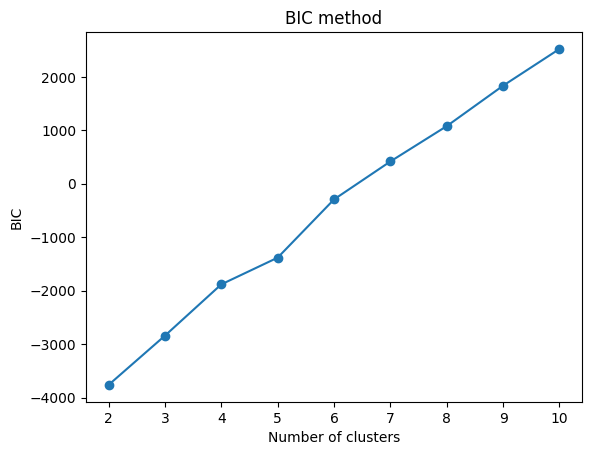

In [ ]:
kmeans = []

for i in range(2,11):
    KM = KMeans(n_clusters=i)
    KM.fit(X_model)
    kmeans.append(KM.fit(X_model))

booleandf = X_model.select_dtypes(include=[bool])
booleanDictionary = {True: 1, False: 0}

X_bic = X_model
for column in booleandf:
    X_bic[column] = X_model[column].map(booleanDictionary)

BIC_arr = [BIC(KM ,X_bic) for KM in kmeans]

plt.plot(range(2,11), BIC_arr, marker='o')
plt.title('BIC method')
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.show()

Mais uma vez, o número $K = 2$ foi a melhor solução.

##### **Análise dos Clusters**

Como foi possível perceber, a maioria das métricas indicou k=2 como a melhor quantidade de clusters a serem utilizadas.

Apesar de os scores de Sillhouette e de Davies-Bouldin terem divergido desse resultado, a quantidade de clusters sugerida por essas métricas é muito alta, o que diminuiria a concisão do modelo e poderia levar a overfitting.

Dessa forma, vamos ficar com $K = 2$.

Como nossos dados posssuem diversas categorias que os representam, vamos visualizar como os clusters se concentram com a variação de valores em cada categoria.

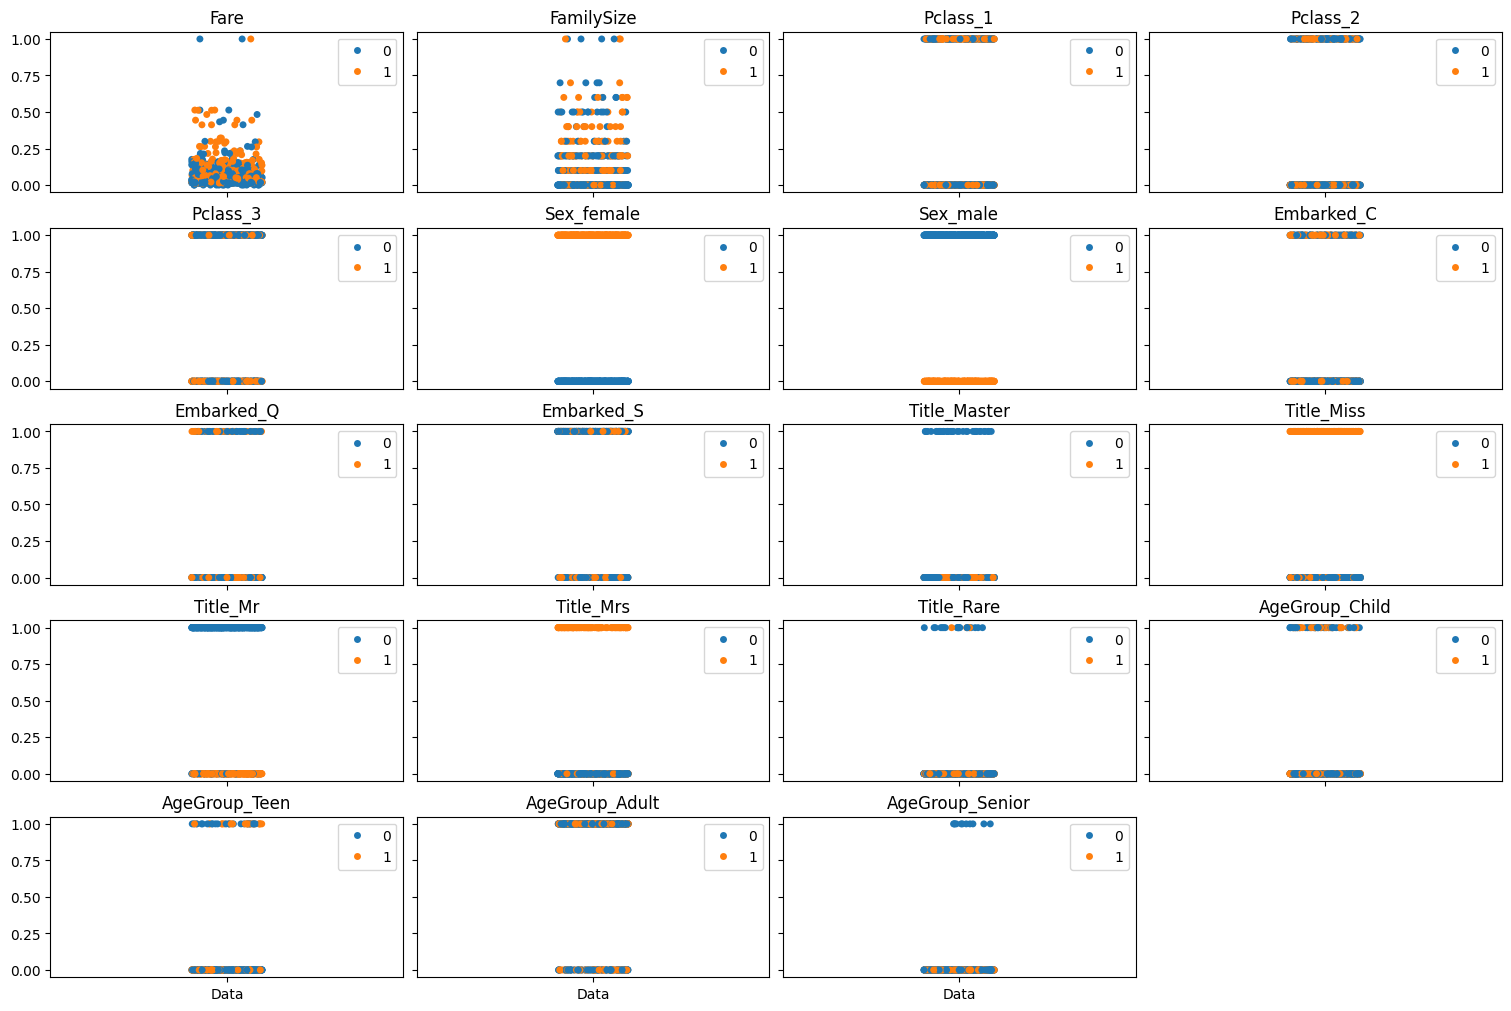

In [ ]:
KM = KMeans(n_clusters=2)
KM.fit(X_model)

fig, axs = plt.subplots(5, 4, sharex=True, sharey=True, layout="constrained")
fig.set_size_inches((15,10))
fig.delaxes(axs[4][3])

a = 0
b = 0
for key in X_model.keys():
  ax = sns.stripplot(x=len(X_model[key])*['Data'],y=X_model[key].values,hue=KM.labels_,jitter=True,ax=axs[a, b])
  ax.set_title(key)
  a = (a + 1) % 5 if b == 3 else a
  b = (b + 1) % 4

plt.show()

#### **DBSCAN**

O DBSCAN é um modelo de agrupamento baseado na densidade dos dados - isto é, os clusters são formados baseados na proximidade entre pontos na região.

Dois parâmetros se mostram essenciais na hora de treinar um modelo DBSCAN:

1. `eps`: define a distância máxima em que duas amostras podem se encontrar uma da outra para serem consideradas do mesmo cluster.
2. `min_samples`: número mínimo de amostras em uma região para que a densidade desejada seja alcançada. Quanto maior a quantidade de amostras do dataset, maior ele deve ser. Como nossa base de dados não é grande, vamos usar o valor `default`do parâmetro.

Para encontrar o `eps`, vamos utilizar uma variação do método "Elbow".

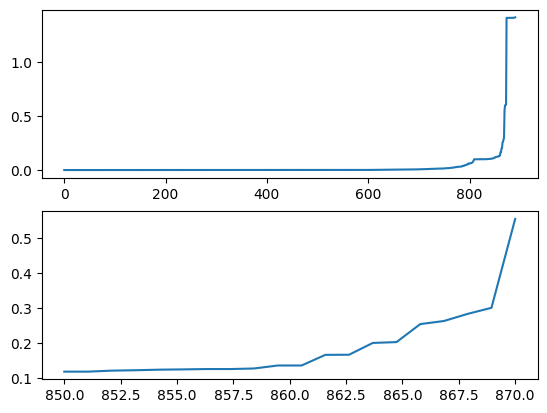

In [ ]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_model)
distances, indices = neighbors_fit.kneighbors(X_model)

fig, axes = plt.subplots(2)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
axes[0].plot(distances)

start=850
end=870
axes[1].plot(np.linspace(start, end, len(distances[start:end])), distances[start:end])

plt.show()

Calculamos a distância média de cada uma das amostras do dataset até seus 5 vizinhos mais próximos - valor do parâmetro `min_samples`. Assim, seguindo o método do "Elbow", o melhor valor da variável `eps` será aquele de máxima curvatura do gráfico, que, pelo gráfico ampliado, indica ser **0,3**.

##### **Análise dos Clusters**

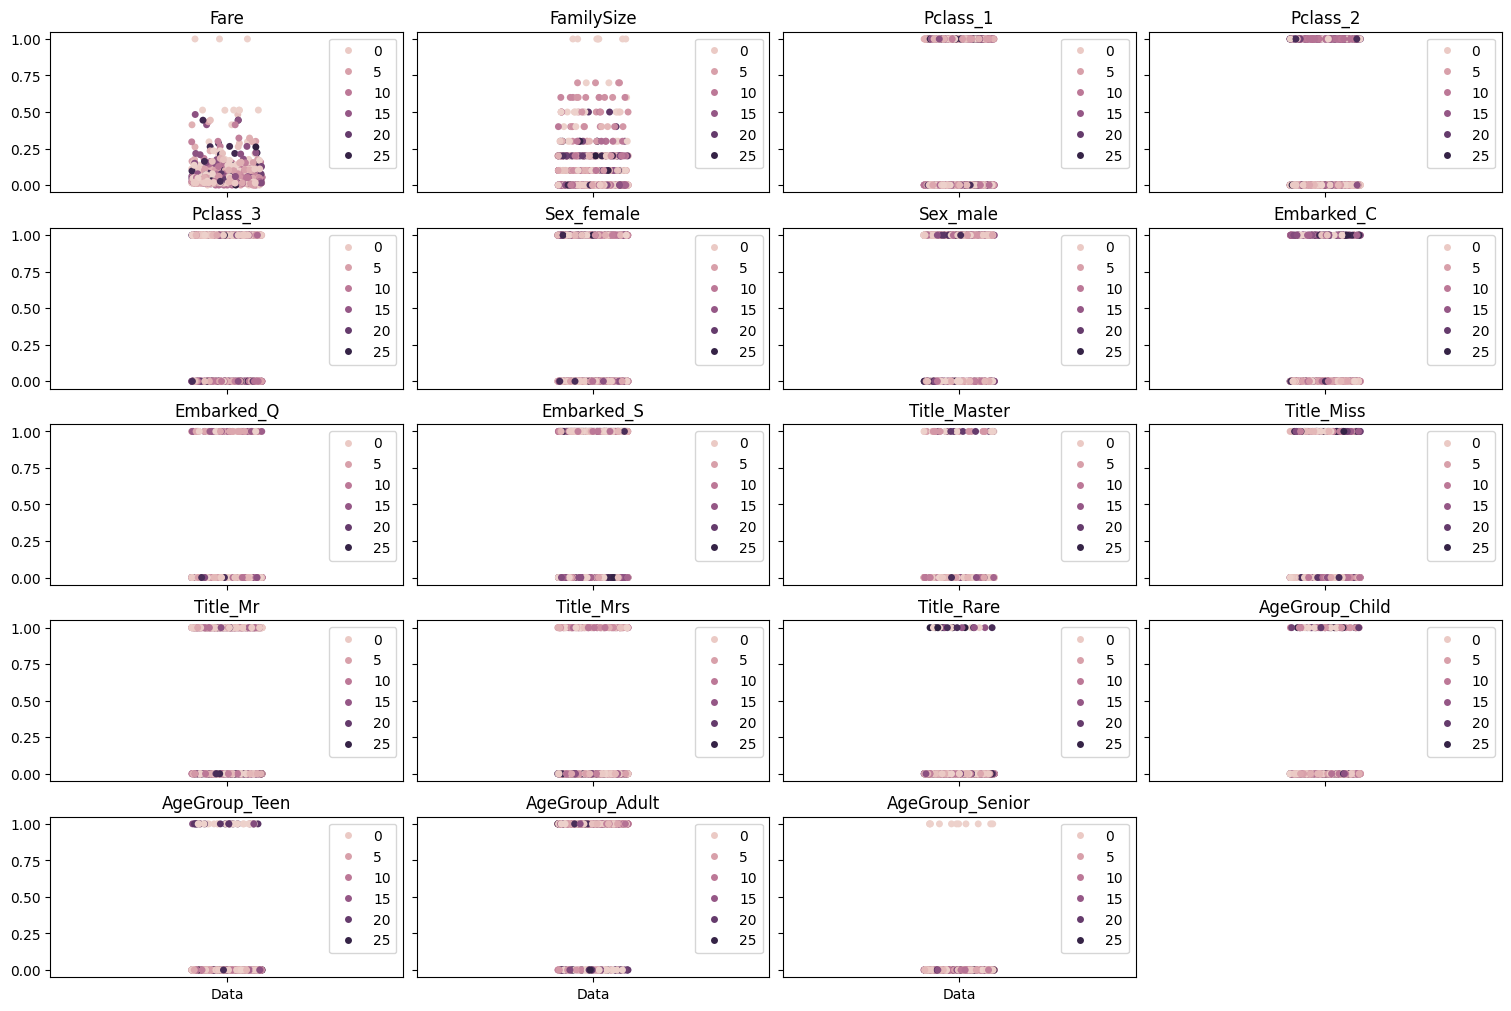

In [ ]:
db = DBSCAN(eps=0.3)
db.fit(X_model)

fig, axs = plt.subplots(5, 4, sharex=True, sharey=True, layout="constrained")
fig.set_size_inches((15,10))
fig.delaxes(axs[4][3])

a = 0
b = 0
for key in X_model.keys():
  ax = sns.stripplot(x=len(X_model[key])*['Data'],y=X_model[key].values,hue=db.labels_,jitter=True,ax=axs[a, b])
  ax.set_title(key)
  a = (a + 1) % 5 if b == 3 else a
  b = (b + 1) % 4

plt.show()

 Comparação entre DBSCAN e K-Means
 Utilizando distância inter-cluster e intra-cluster.

In [ ]:
from scipy.spatial.distance import cdist

def intra_cluster_distance_kmeans(X, kmeans):
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    distances = []

    for i in range(kmeans.n_clusters):
        cluster_points = X[labels == i]
        centroid = centroids[i]
        distances.append(np.mean(cdist(cluster_points, [centroid], 'euclidean')))

    return np.mean(distances)

intra_kmeans = intra_cluster_distance_kmeans(X_model, KM)
print(f"Intra-cluster distance for K-Means: {intra_kmeans}")

Intra-cluster distance for K-Means: 1.2353945192301152


In [ ]:
def intra_cluster_distance_dbscan(X, dbscan):
    labels = dbscan.labels_
    unique_labels = set(labels)
    unique_labels.discard(-1)  # Remove noise points
    distances = []

    for label in unique_labels:
        cluster_points = X[labels == label]
        distances.append(np.mean(cdist(cluster_points, cluster_points, 'euclidean')))

    return np.mean(distances)

intra_dbscan = intra_cluster_distance_dbscan(X_model, db)
print(f"Intra-cluster distance for DBSCAN: {intra_dbscan}")


Intra-cluster distance for DBSCAN: 0.1058609107864744


In [ ]:
def inter_cluster_distance_kmeans(kmeans):
    centroids = kmeans.cluster_centers_
    return np.mean(cdist(centroids, centroids, 'euclidean'))

inter_kmeans = inter_cluster_distance_kmeans(KM)
print(f"Inter-cluster distance for K-Means: {inter_kmeans}")

Inter-cluster distance for K-Means: 0.9190592669321824


In [ ]:
def inter_cluster_distance_dbscan(X, dbscan):
    labels = dbscan.labels_
    unique_labels = set(labels)
    unique_labels.discard(-1)  # Remove noise points
    cluster_centers = []

    for label in unique_labels:
        cluster_points = X[labels == label]
        cluster_centers.append(np.mean(cluster_points, axis=0))

    return np.mean(cdist(cluster_centers, cluster_centers, 'euclidean'))

inter_dbscan = inter_cluster_distance_dbscan(X_model, db)
print(f"Inter-cluster distance for DBSCAN: {inter_dbscan}")

Inter-cluster distance for DBSCAN: 2.297965174674765


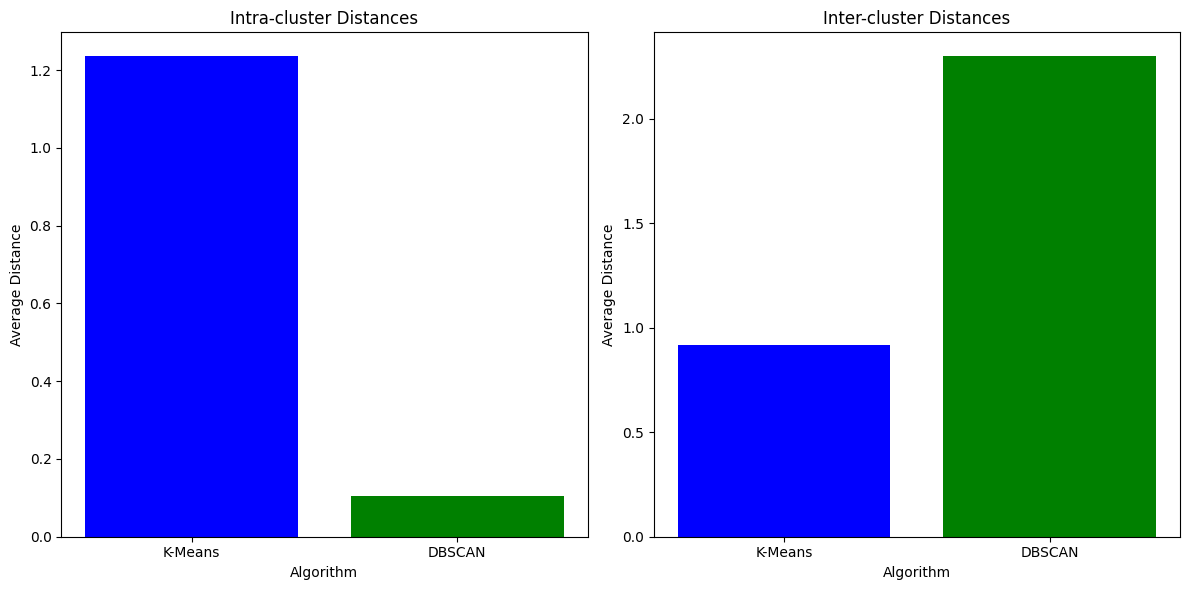

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dados das distâncias
algorithms = ['K-Means', 'DBSCAN']
intra_distances = [intra_kmeans, intra_dbscan]
inter_distances = [inter_kmeans, inter_dbscan]

# Gráfico de barras
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Distâncias intra-clusters
ax[0].bar(algorithms, intra_distances, color=['blue', 'green'])
ax[0].set_title('Intra-cluster Distances')
ax[0].set_ylabel('Average Distance')
ax[0].set_xlabel('Algorithm')

# Distâncias inter-clusters
ax[1].bar(algorithms, inter_distances, color=['blue', 'green'])
ax[1].set_title('Inter-cluster Distances')
ax[1].set_ylabel('Average Distance')
ax[1].set_xlabel('Algorithm')

plt.tight_layout()
plt.show()

**Distância Intra-Cluster**
**K-Means:** A distância intra-cluster é 1.235. Isso indica que, em média, os pontos dentro de um cluster estão a uma distância relativamente maior do centro do cluster. Esse valor pode ser um reflexo de clusters menos compactos ou de uma variabilidade maior dentro dos clusters.

**DBSCAN:** A distância intra-cluster é 0.106. Esse valor é muito menor em comparação com o K-Means, indicando que os pontos dentro dos clusters formados pelo DBSCAN estão muito próximos uns dos outros. Isso sugere que DBSCAN está formando clusters mais compactos.


**Distância Inter-Cluster**
**K-Means:** A distância inter-cluster é 0.919. Esse valor indica que os centros dos clusters estão a uma distância relativamente próxima uns dos outros, sugerindo que os clusters formados pelo K-Means podem estar relativamente próximos ou sobrepostos.

**DBSCAN:** A distância inter-cluster é 2.298. Esse valor é significativamente maior, indicando que os clusters formados pelo DBSCAN estão mais separados. Isso sugere que DBSCAN pode estar formando clusters mais distintos e bem separados.